This notebook discusses NRLEE nucleosynthesis.  Here is the anatomy of a NRLEE:
    
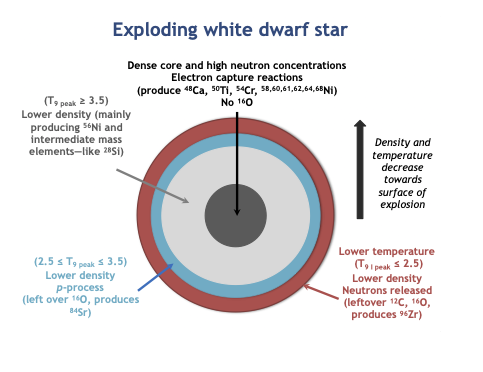

First, import the necessary packages

In [1]:
import sys
!{sys.executable} -m pip install --quiet wnutils
!{sys.executable} -m pip install --quiet urllib3

Now import the package to check for and retrieve the data:

In [2]:
import os.path
from os import path
import urllib.request

If the data do not exist, retrieve and unpack them by running the code block below:

In [3]:
if not path.exists('output'):
    url = 'http://nucnet-tools.sourceforge.net/data_pub/nrlee/2021-01-08/output.tar.gz'
    filename = 'output.tar.gz'
    urllib.request.urlretrieve(url,filename)
    !tar zxvf output.tar.gz

Import the [wnutils](https://wnutils.readthedocs.io) [XML](https://www.w3.org/TR/REC-xml/)** package:

In [4]:
import wnutils.xml as wx

Read data

In [5]:
h = wx.Xml('output/h_burn/out.xml')
he = wx.Xml('output/he_burn/out.xml')
sproc = wx.Xml('output/s-process/exp_tau.xml')
outer = wx.Xml('output/outer_layers/full.xml')
inner = wx.Xml('output/inner_layers/full.xml')

Plot hydrogen burning

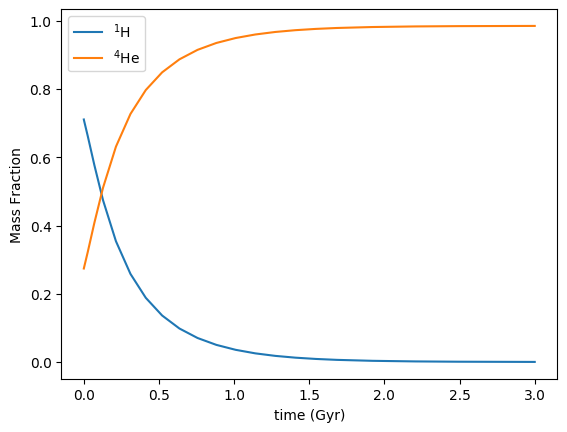

In [6]:
species = ['h1', 'he4']
h.plot_mass_fractions_vs_property('time', species, xfactor = 3.15e17, xlabel='time (Gyr)', use_latex_names = True)

Plot helium burning

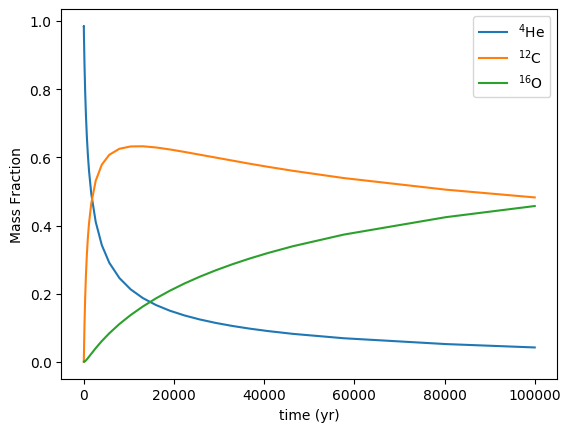

In [7]:
species = ['he4', 'c12', 'o16']
he.plot_mass_fractions_vs_property('time', species, xfactor = 3.15e7, xlabel='time (yr)', use_latex_names = True)

Plot s-process abundances (exponential distribution with $\tau_0 = 0.3\ mb^{-1}$).

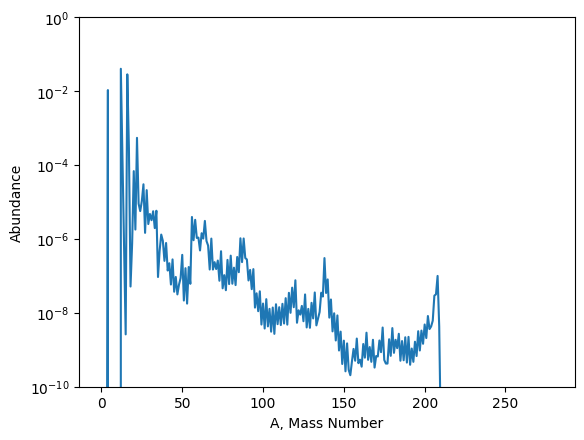

In [8]:
sproc.plot_abundances_vs_nucleon_number(ylim=[1.e-10,1], xlabel='A, Mass Number', ylabel='Abundance', yscale='log')

Plot outer layers.

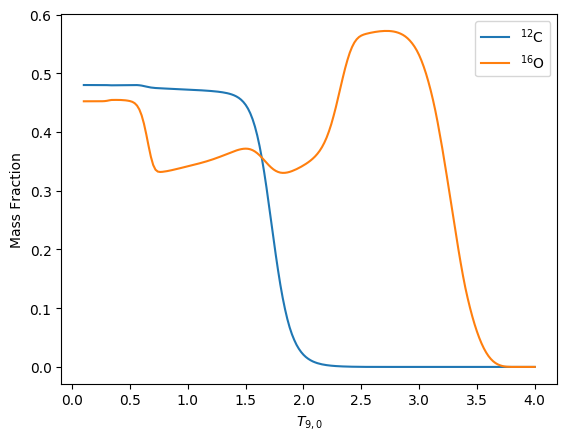

In [9]:
species = ['c12', 'o16']
outer.plot_mass_fractions_vs_property('t9_0', species, xlabel='$T_{9,0}$', use_latex_names=True)

Plot other species in outer layers.

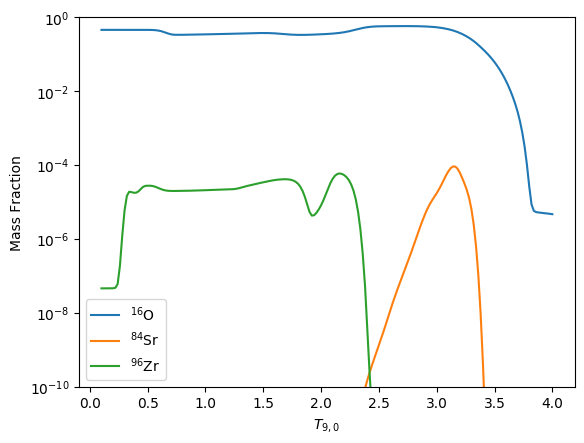

In [10]:
species = ['o16', 'sr84', 'zr96']
outer.plot_mass_fractions_vs_property('t9_0', species, xlabel='$T_{9,0}$', use_latex_names=True, yscale='log', ylim=[1.e-10,1])

Plot inner layers.

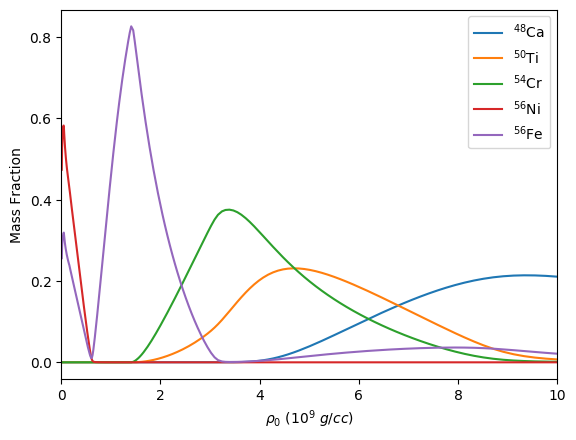

In [11]:
species = ['ca48', 'ti50', 'cr54', 'ni56', 'fe56']
inner.plot_mass_fractions_vs_property('rho_0', species, xlabel='$\\rho_0\\ (10^9\\ g/cc)$', use_latex_names=True, xlim=[0,10],xfactor=1.e9)